<a href="https://colab.research.google.com/github/Snoke9/MLaDA/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 3
# Бинарная классификация
**Цель работы:** познакомиться с применением модели машинного обучения для решения задачи классификации (метод логистической регрессии)

Выполним анализ набора данных «Выживаемость пациентов». Набор данных содержит информацию о выживаемости пациенток, перенесших операцию по поводу рака молочной железы. Набор содержит случаи из исследования, проводившегося с 1958 по 1970 год в больнице Биллингса Чикагского университета. Набор данных включает следующие атрибуты:

* **age** – возраст пациента на момент операции (целое число)
* **year** – год операции пациента (целое число)
* **nodes** – количество обнаруженных положительных подмышечных узлов (целое число)
* **survival** – статус выживания (целевая переменная), где 0 – означает, что пациент умер в течение 5 лет, а 1 – означает, что пациент прожил 5 лет или дольше.



### Импортируем библиотеки и загружаем данные

In [391]:
import numpy as mp
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [392]:
df = pd.read_csv('/content/drive/MyDrive/datasets/haberman.csv')
# заменим двойки на нули
df['survival'] = df['survival'].map({1: 1, 2: 0})
df.head()

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Выведем целевую переменную, целевые имена и частоту каждого уникального значения

In [393]:
(unique, counts) = np.unique(df['survival'], return_counts=True)
print(f'Уникальные значения целевой переменной: {unique}')
print(f'Количество записей целевой переменной: {counts}')

Уникальные значения целевой переменной: [0 1]
Количество записей целевой переменной: [ 81 225]


Построим столбчатую диаграмму, чтобы увидеть целевую переменную:

<Axes: xlabel='survival', ylabel='count'>

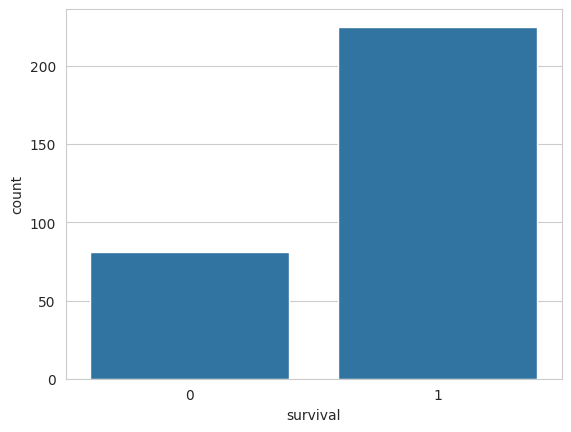

In [394]:
sns.set_style('whitegrid')
sns.countplot(df, x='survival')

Анализ диаграммы показывает, что набор данных является сбалансированным

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       306 non-null    int64
 1   year      306 non-null    int64
 2   nodes     306 non-null    int64
 3   survival  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


В этом наборе данных у нас есть два класса: 0 и 1, что делает эту задачу задачей бинарной классификации

Выполним бинарную классификацию с использованием логистический регрессии с помощью sklearn



#### Проверяем наличие пропущенных значений и выбросов

In [396]:
#проверяем на пропущенные значения
print(df.isnull().sum())

age         0
year        0
nodes       0
survival    0
dtype: int64


<Axes: xlabel='age'>

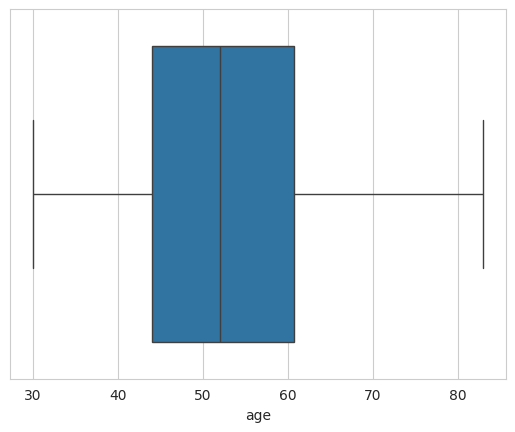

In [397]:
#проверяем на выбросы
sns.boxplot(x=df['age'])

#### Разделяем данные на признаки и целевую переменную

In [398]:
df_copy = df
y = df_copy['survival']
X = df_copy.drop('survival', axis=1)

In [399]:
X

,age,year,nodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4
...,...,...,...
301,75,62,1
302,76,67,0
303,77,65,3
304,78,65,1


#### Применяем операции нормализации для численной устойчивости

In [400]:
from sklearn.preprocessing import StandardScaler
standartizer = StandardScaler()
X = standartizer.fit_transform(X)

In [401]:
X

array([[-2.08214014e+00,  3.53584065e-01, -4.21592031e-01],
       [-2.08214014e+00, -2.62921484e-01, -1.42958853e-01],
       [-2.08214014e+00,  6.61836839e-01, -5.60908620e-01],
       [-1.98942552e+00, -1.18767981e+00, -2.82275442e-01],
       [-1.98942552e+00,  6.61836839e-01, -3.64226377e-03],
       [-1.80399628e+00, -1.49593258e+00,  8.32257270e-01],
       [-1.80399628e+00, -8.79427033e-01, -5.60908620e-01],
       [-1.71128165e+00, -1.18767981e+00, -5.60908620e-01],
       [-1.71128165e+00,  9.70089614e-01,  6.92940681e-01],
       [-1.71128165e+00, -1.49593258e+00,  3.61858905e+00],
       [-1.71128165e+00, -8.79427033e-01, -4.21592031e-01],
       [-1.71128165e+00, -5.71174259e-01,  8.32257270e-01],
       [-1.71128165e+00,  1.27834239e+00,  4.14307503e-01],
       [-1.71128165e+00, -8.79427033e-01, -5.60908620e-01],
       [-1.61856703e+00,  3.53584065e-01,  1.25020704e+00],
       [-1.61856703e+00,  4.53312904e-02, -5.60908620e-01],
       [-1.52585241e+00, -8.79427033e-01

### Разделяем данные на тренировочный и тестовый наборы

82% данных используется для обучения и 18% — для тестирования.

In [402]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=0)

In [403]:
# создаем экземпляр модели с учетом взвешенности классов
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [404]:
y_pred = model.predict(X_test)

#### Рассчитываем показатели точности, сравнив фактические и прогнозируемые значения

In [405]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print(f'True Positive(TP) = {TP}')
print(f'False Positive(FP) = {FP}')
print(f'True Negative(TN) = {TN}')
print(f'False Negative(FN) = {FN}')

accuracy = (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP) = 34
False Positive(FP) = 21
True Negative(TN) = 1
False Negative(FN) = 0
Accuracy of the binary classification = 0.625


In [406]:
# оцениваем точность модели
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.625


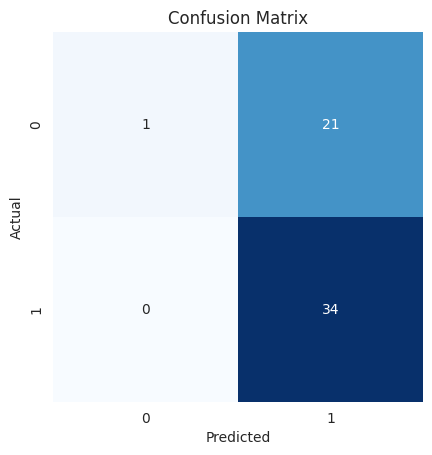

In [407]:
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [408]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность: {accuracy:.2f}')

Точность: 0.62


In [409]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Точность: {precision:.2f}')
print(f'Полнота: {recall:.2f}')

Точность: 0.62
Полнота: 1.00


In [410]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'F1-мера: {f1:.2f}')

F1-мера: 0.76


In [411]:
df_copy.corr()

,age,year,nodes,survival
age,1.000000,0.089529,-0.063176,-0.067950
year,0.089529,1.000000,-0.003764,0.004768
nodes,-0.063176,-0.003764,1.000000,-0.286768
survival,-0.067950,0.004768,-0.286768,1.000000


In [412]:
from sklearn.metrics import roc_curve, auc

In [413]:
# Получаем предсказание вероятности для класса 1
y_score = model.predict_proba(X_test)[:, 1]

In [414]:
# Рассчитываем FPR, TPR и пороги
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [415]:
# Рассчитываем AUC - площадь под кривой
roc_auc = auc(fpr, tpr)

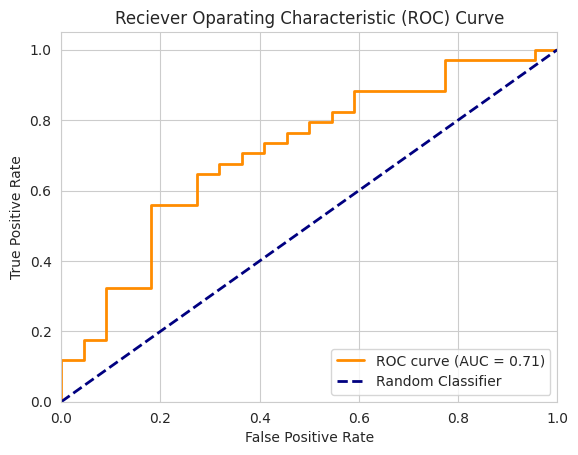

In [416]:
# Строим график
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Oparating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()